### Drug review data analytics
---
In this project, the drug reviews available on UCI publicly available dataset is analyzed. <br>
The dataset is accessible via: <a href="https://www.kaggle.com/jessicali9530/kuc-hackathon-winter-2018"> UCI drug review</a> <br>

This dataset contains around 215,000 patient reviews on drugs. Recorded data spans from the year 2008 until 2017.

The data contains the following features:
<ul>
<li> Drug name</li>
<li> Patient condition </li>
<li> review of the patient</li>
<li> rating </li>
<li> count of usefulness of the drug </li>
</ul>

In the following, I intend to elaborate on `data statistics`, `preprocessing`, `data cleaning`, and finally train a `machine learning` model to estimate the rating of the patient based on their reviews.

Hence the following topics are covered:
- Processing the data using `pandas`
- Data distribution and visualization using `seaborn`
- Word frequency to analyze the most common health condition among patients with `wordcloud` 
- Natural language processing (NLP) to analyze the reviews from `nltk`
- Apply a machine learning model to the review as the main feature using `Xgboost`

---

In [1]:
# Importing required libraries
#############
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import zipfile
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import re
import os

In [3]:

# The archive zip file downloaded from the description and is extracted to cwd
###########
with zipfile.ZipFile('./archive.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

For some reason, the training and test sets are separate. We merge them together and later on we will use `train_test_split` from `sklearn.preprocessing` to split the dataset.

<blockquote>Note that if the machine learning model is based on time-series (i.e. prediction of future patients) using LSTM in deep learning or other time-series based techniques, then leave the training and test datasets and deploy the ML on the training and then evaluate on the test set.</blockquote>

In [4]:
df_test = pd.read_csv('drugsComTest_raw.csv',parse_dates=['date'])
df_train = pd.read_csv('drugsComTrain_raw.csv',parse_dates=['date'])
df = pd.concat([df_train,df_test])                   # Merging the test and train dataset
df_sorted = df.sort_values(by='date')

##### Show the distribution of reviews per year

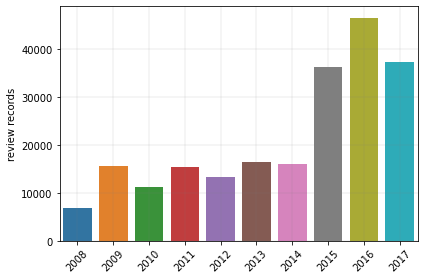

In [5]:
year_counts = df_sorted['date'].dt.year.value_counts()
year_counts.rename('review records',inplace=True)
year_labels = year_counts.index
sns.barplot(x = year_labels, y = year_counts)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(linewidth=0.15,color='grey')

In [6]:
le_condition = LabelEncoder()
df_sorted['condition'] = le_condition.fit_transform(df_sorted['condition'])
top_ten_condition = df_sorted.nlargest(10,'condition')
count_max_condition = df_sorted['condition'].where(df_sorted['condition']==df_sorted['condition'].max()).count()
print(f'The number of conditions with maximum occurrances: {count_max_condition}')

The number of conditions with maximum occurrances: 1194


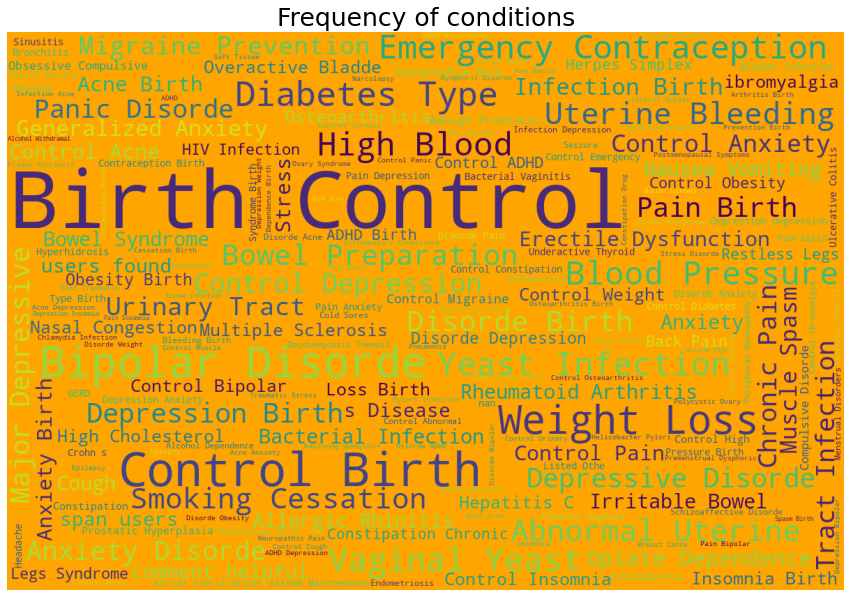

In [7]:
stopwords = set(STOPWORDS)
condition_words = str(list(df['condition']))
filtered_words = re.sub('[^A-Za-z]+', ' ', condition_words)
wordcloud_condition = WordCloud(background_color='orange',
                      stopwords=stopwords,width=1200,
                      height=800).generate(filtered_words)

plt.rcParams['figure.figsize'] = (15,15)
plt.title('Frequency of conditions',fontsize=25)
plt.axis('off')
plt.imshow(wordcloud_condition)
plt.show()

Based on the above finding, the most common health condition among patients is `birth control`. 

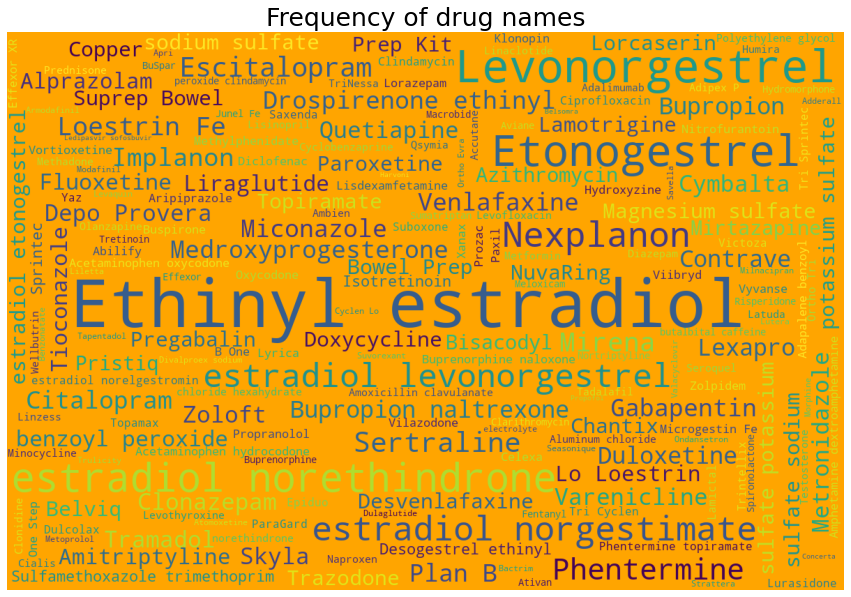

In [8]:
drug_words = str(list(df['drugName']))
filtered_drug_words = re.sub('[^A-Za-z]+', ' ', drug_words)
wordcloud_drug = WordCloud(background_color='orange',
                      stopwords=stopwords,width=1200,
                      height=800).generate(filtered_drug_words)

plt.rcParams['figure.figsize'] = (15,15)
plt.title('Frequency of drug names',fontsize=25)
plt.axis('off')
plt.imshow(wordcloud_drug)
plt.show()

The most widely used drug for treatment is `Ethinyl estradiol`.

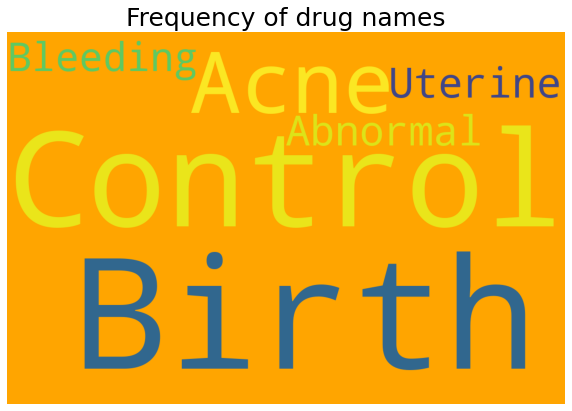

In [24]:
conditions_treated_with_ethinyl = df[df['drugName'].str.contains('ethinyl estradiol',
                                                                 case=False)][['condition']]
condition_for_ethinyl_words = str(conditions_treated_with_ethinyl)
text = condition_for_ethinyl_words
rep = {'columns':'','rows':'','x':'','condition':''}
rep = dict((re.escape(k), v) for k, v in rep.items()) 
pattern = re.compile("|".join(rep.keys()))
text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text)

filtered_condition_for_ethinyl_words = re.sub('[^A-Za-z]+', ' ', text)
wordcloud_condition_ethinyl = WordCloud(background_color='orange',
                      stopwords=stopwords,width=1200,
                      height=800).generate(filtered_condition_for_ethinyl_words)

plt.rcParams['figure.figsize'] = (10,10)
plt.title('Frequency of drug names',fontsize=25)
plt.axis('off')
plt.imshow(wordcloud_condition_ethinyl)
plt.show()

Based on the above observation, `ethynil estradiol` have been used for the following conditions in order of counts:
- `Birth control`
- `Acne`
- `Abnormal bleeding`
- `Uterine`

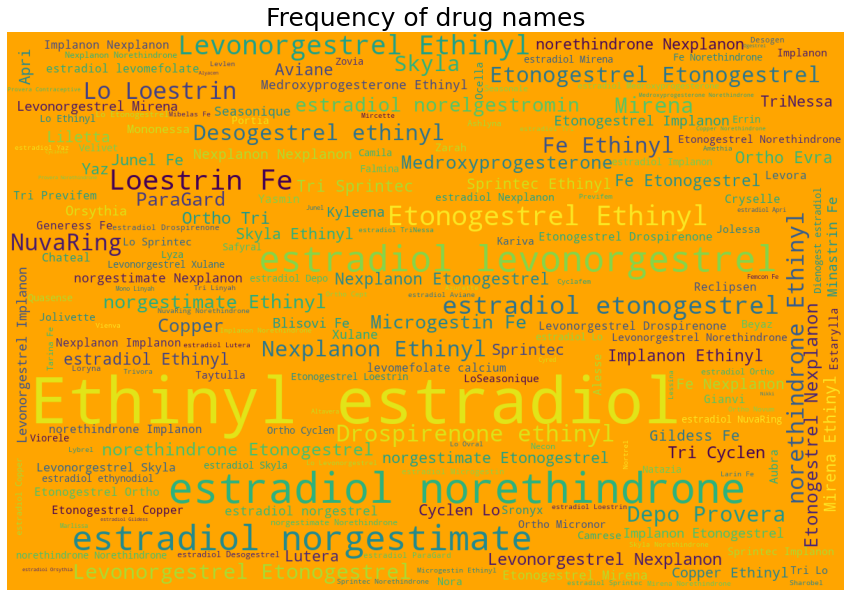

In [26]:
birth_control_drugs = df[df['condition']=='Birth Control'][['drugName','usefulCount']]
birth_drug_words = str(list(birth_control_drugs['drugName']))
filtered_birth_drug_words = re.sub('[^A-Za-z]+', ' ', birth_drug_words)
wordcloud_birth_drug = WordCloud(background_color='orange',
                      stopwords=stopwords,width=1200,
                      height=800).generate(filtered_birth_drug_words)

plt.rcParams['figure.figsize'] = (15,15)
plt.title('Frequency of drug names',fontsize=25)
plt.axis('off')
plt.imshow(wordcloud_birth_drug)
plt.show()

The above graph shows that other drugs have also been used to treat `Birth control`, however, the majority of patients took `Ethynil estradiol`.

/home/hadi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'usefulcount')

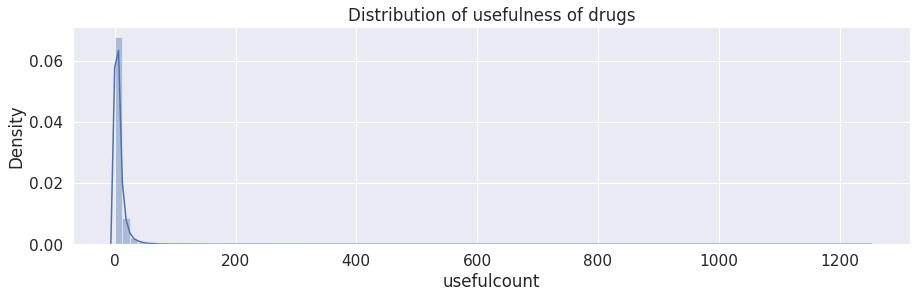

In [27]:
plt.rcParams['figure.figsize'] = [15,4]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots()
sns_1 = sns.distplot(birth_control_drugs['usefulCount'],bins = 100,ax=ax)
sns_1.set_title('Distribution of usefulness of drugs')
sns_1.set_xlabel("usefulcount")

This plot shows the distribution of `useful counts` for all drugs. There are a number of outliers on the order of `1200`, but most of the drugs taken by patients were counted around less than 100s.

One possible question to ask is what is the total population of patients from which this feature refers to.

In [28]:
birth_control_drugs.where(birth_control_drugs['usefulCount']==birth_control_drugs['usefulCount'].max()).count()
birth_control_drugs[birth_control_drugs['usefulCount']==birth_control_drugs['usefulCount'].max()]['drugName']

4249             Mirena
21708    Levonorgestrel
Name: drugName, dtype: object

Maximum useful drugs for birth control are `Mirena` and `Levonorgestrel`

In [29]:
df_sorted['rating'][df_sorted['rating'] <5] = 0 
df_sorted['rating'][df_sorted['rating']>=5] = 1

/tmp/ipykernel_3413/1952095264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['rating'][df_sorted['rating'] <5] = 0
/tmp/ipykernel_3413/1952095264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['rating'][df_sorted['rating']>=5] = 1


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /home/hadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df_sorted['review'][1]

1    "My son has Crohn&#039;s disease and has done ...
1    "My son is halfway through his fourth week of ...
Name: review, dtype: object

In [ ]:
corpus = []
for i in range(len(df_sorted['review'])):
    review = re.sub('[^a-zA-Z]',' ', str(df_sorted['review'][i]))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer() # Porter Stemmer object
    list_stopwords = stopwords.words('english')
    list_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(list_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [30]:
if os.path.exists('drugsComTest_raw.csv'):
    os.remove('drugsComTest_raw.csv')

if os.path.exists('drugsComTrain_raw.csv'):
    os.remove('drugsComTrain_raw.csv')
    